In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore')

Populating the interactive namespace from numpy and matplotlib


In [3]:
data = pd.read_excel('data/DEFAULT_AVG_TIME.xls')
data.shape

In [4]:
vc = data['nnkd'].value_counts()

In [5]:
len(vc)

5003

### Credit_TermApr vs MA_Proposed_Term

Для многих значения разница между этими признакми равна в 1 месяц. 

In [41]:
data[['Credit_TermApr', 'MA_Proposed_Term']][:2]

,Credit_TermApr,MA_Proposed_Term
0,61,60
1,12,12


In [37]:
(data['Credit_TermApr']-data['MA_Proposed_Term']).value_counts()[1]

13966

In [38]:
# новый признак
ll =  (data['Credit_TermApr']-data['MA_Proposed_Term'])>=0 # либо > 0
ll.value_counts()

True     18171
False      138
dtype: int64

In [49]:
data[(data['nnkd']== '1-RUR-0000-3679394')]

,nnkd,mob,MOB_term,Credit_TermApr,curr_del_cap_share_one,curr_rep_cap_share_one,bad,maxdelay_one,DaysInCollection_one,delays_one,...,MA_Exp_Month_Paym,MA_MONTH_AT_CURR_JOB,MA_Time_Previous_Job,MA_Installment_Amount,MA_Proposed_Amount,MA_Proposed_Term,TOT_INCOME,PARTWH_INCOME,PAYMD2TOTPAYM,PTI
11784,1-RUR-0000-3679394,11,0.297297,37,0.808263,0.191737,0,63,20,1,...,12000.0,193,12,28642.84,750000,36,147500.0,0.0,0.507859,0.194189
11829,1-RUR-0000-3679394,7,0.189189,37,0.897297,0.102703,0,2,1,0,...,12000.0,193,12,28642.84,750000,36,147500.0,0.0,0.534542,0.194189
11921,1-RUR-0000-3679394,4,0.108108,37,0.959903,0.040097,0,0,2,0,...,12000.0,193,12,28642.84,750000,36,147500.0,0.0,0.524756,0.194189
11998,1-RUR-0000-3679394,8,0.216216,37,0.876351,0.123649,0,2,10,0,...,12000.0,193,12,28642.84,750000,36,147500.0,0.0,0.536672,0.194189
12200,1-RUR-0000-3679394,5,0.135135,37,0.918932,0.081068,0,2,2,0,...,12000.0,193,12,28642.84,750000,36,147500.0,0.0,0.529013,0.194189
12216,1-RUR-0000-3679394,12,0.324324,37,0.783926,0.216074,1,63,32,1,...,12000.0,193,12,28642.84,750000,36,147500.0,0.0,0.559586,0.194189
12302,1-RUR-0000-3679394,11,0.297297,37,0.839856,0.160144,0,63,20,1,...,12000.0,193,12,28642.84,750000,36,147500.0,0.0,0.507859,0.194189
12547,1-RUR-0000-3679394,9,0.243243,37,0.853422,0.146578,1,12,32,0,...,12000.0,193,12,28642.84,750000,36,147500.0,0.0,0.545577,0.194189


In [ ]:
data.iloc[[11784, 12302]].T

In [63]:
# подсчет частот по nnkd
data['nnkd'].map(data['nnkd'].value_counts())

0         8
1         7
2         7
3         8
4         8
         ..
18304     6
18305    12
18306     1
18307     1
18308     4
Name: nnkd, Length: 18309, dtype: int64

In [126]:
%%time
indx = vc[(vc>1) == True].index
dll = pd.DataFrame([])
for i in indx:
    temp_data = data[(data['nnkd']== i)]
    temp_data['freq']= temp_data['mob'].map(temp_data['mob'].value_counts())

    tt = temp_data[temp_data['freq']>1]
    if tt.shape[0] > 0:
        dll = pd.concat([dll, tt])
    

Wall time: 10.7 s


In [189]:
# удалить все совпадающие, узнать про отличающиеся переменные

In [188]:
dll

,nnkd,mob,MOB_term,Credit_TermApr,curr_del_cap_share_one,curr_rep_cap_share_one,bad,maxdelay_one,DaysInCollection_one,delays_one,...,MA_MONTH_AT_CURR_JOB,MA_Time_Previous_Job,MA_Installment_Amount,MA_Proposed_Amount,MA_Proposed_Term,TOT_INCOME,PARTWH_INCOME,PAYMD2TOTPAYM,PTI,freq
186,1-RUR-0000-3143488,7,0.189189,37,0.908143,0.091857,0,76,16,1,...,10,84,8187.06,200000,36,63000.0,0.0,0.564082,0.129953,2
866,1-RUR-0000-3143488,7,0.189189,37,0.840692,0.159308,0,76,16,1,...,10,84,8187.06,200000,36,63000.0,0.0,0.564082,0.129953,2
1292,1-RUR-4500-3166662,3,0.049180,61,0.989215,0.010785,0,49,5,1,...,24,24,12003.94,400000,60,47000.0,1.0,0.402126,0.255403,2
2330,1-RUR-4500-3166662,10,0.163934,61,0.920143,0.079857,0,84,21,2,...,24,24,12003.94,400000,60,47000.0,1.0,0.447395,0.255403,2
3278,1-RUR-4500-3166662,10,0.163934,61,0.889185,0.110815,0,84,21,2,...,24,24,12003.94,400000,60,47000.0,1.0,0.447395,0.255403,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8544,1-RUR-0000-3278569,15,0.405405,37,0.702515,0.297485,1,20,32,0,...,64,36,6277.26,160000,36,22000.0,1.0,0.537455,0.285330,2
14628,1-RUR-0000-3445240,15,0.405405,37,0.716614,0.283386,1,18,32,0,...,22,96,11769.86,300000,36,37000.0,1.0,0.554547,0.318104,2
15759,1-RUR-0000-3445240,15,0.405405,37,0.716363,0.283637,1,18,32,0,...,22,96,11769.86,300000,36,37000.0,1.0,0.554547,0.318104,2
17018,1-RUR-4500-4047509,6,0.162162,37,0.921374,0.078626,1,1,32,0,...,37,32,5884.93,150000,36,45000.0,0.0,0.460701,0.130776,2


In [196]:
ttt = dll.groupby('nnkd').count()['bad']

In [199]:
dll[(dll['nnkd']== '1-RUR-0000-3152310')]

,nnkd,mob,MOB_term,Credit_TermApr,curr_del_cap_share_one,curr_rep_cap_share_one,bad,maxdelay_one,DaysInCollection_one,delays_one,...,MA_MONTH_AT_CURR_JOB,MA_Time_Previous_Job,MA_Installment_Amount,MA_Proposed_Amount,MA_Proposed_Term,TOT_INCOME,PARTWH_INCOME,PAYMD2TOTPAYM,PTI,freq
3016,1-RUR-0000-3152310,11,0.305556,36,0.750862,0.249138,1,66,32,2,...,313,12,2886.97,70000,35,13600.0,1.0,0.553345,0.212277,2
3194,1-RUR-0000-3152310,8,0.222222,36,0.878620,0.121380,0,66,6,1,...,313,12,2886.97,70000,35,13600.0,1.0,0.548343,0.212277,2
3453,1-RUR-0000-3152310,8,0.222222,36,0.809882,0.190118,0,66,6,1,...,313,12,2886.97,70000,35,13600.0,1.0,0.548343,0.212277,2
3798,1-RUR-0000-3152310,13,0.361111,36,0.697221,0.302779,0,66,23,3,...,313,12,2886.97,70000,35,13600.0,1.0,0.567457,0.212277,2
3962,1-RUR-0000-3152310,13,0.361111,36,0.750862,0.249138,0,66,23,3,...,313,12,2886.97,70000,35,13600.0,1.0,0.567457,0.212277,2
5085,1-RUR-0000-3152310,11,0.305556,36,0.802386,0.197614,1,66,32,2,...,313,12,2886.97,70000,35,13600.0,1.0,0.553345,0.212277,2


In [187]:
data.iloc[[3016, 3194]].T

,3016,3194
nnkd,1-RUR-0000-3152310,1-RUR-0000-3152310
mob,11,8
MOB_term,0.305556,0.222222
Credit_TermApr,36,36
curr_del_cap_share_one,0.750862,0.87862
curr_rep_cap_share_one,0.249138,0.12138
bad,1,0
maxdelay_one,66,66
DaysInCollection_one,32,6
delays_one,2,1


In [ ]:
## идея для новой фичи 
vc = data['nnkd'].value_counts()

nl = []
for i in vc.index:
    nl.append(i.split('-')[2])

pd.DataFrame(nl).value_counts()

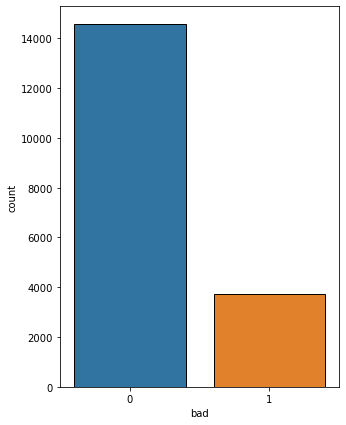

In [9]:
plt.figure(figsize=(5,7))
sns.countplot(x=data['bad'], edgecolor='k')
plt.show()